In [1]:
from keras import Sequential
from keras.layers import LSTM ,Input,Dense
from keras.models import Model 
from keras.utils.vis_utils import plot_model
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('2330_history.csv')
old_data = data[data.Date <'2018/01/01'].Close.values
new_data = data[data.Date >='2018/01/01'].Close.values
data

,Date,Open,High,Low,Close,Change,Change%,Volume('000 shares)
0,2022/01/07,643.0,646.0,632.0,634.0,-10.0,-1.55,39847.766
1,2022/01/06,638.0,646.0,636.0,644.0,-6.0,-0.92,57490.736
2,2022/01/05,669.0,669.0,646.0,650.0,-6.0,-0.91,72505.550
3,2022/01/04,645.0,656.0,644.0,656.0,25.0,3.96,90945.643
4,2022/01/03,619.0,632.0,618.0,631.0,16.0,2.60,73703.302
...,...,...,...,...,...,...,...,...
2450,2012/01/16,76.1,76.9,74.6,75.3,-2.2,-2.84,37711.367
2451,2012/01/13,77.2,78.0,77.0,77.5,0.5,0.65,57757.708
2452,2012/01/12,76.7,77.1,76.5,77.0,0.5,0.65,55520.616
2453,2012/01/11,76.8,77.0,76.1,76.5,0.0,0.00,44295.291


In [3]:
old_data= old_data.reshape(-1,1)
new_data = new_data.reshape(-1,1)
mms = MinMaxScaler()
old_data = mms.fit_transform(old_data)
old_data
new_data = mms.fit_transform(new_data)

In [4]:
train_x = []
train_y = []
test_x = []
test_y = []
for i in range(10,len(old_data)):
    train_x.append(old_data[i-10:i-1,0])
    train_y.append(old_data[i,0])
for i in range(10,len(new_data)):
    test_x.append(new_data[i-10:i-1,0])
    test_y.append(new_data[i,0])
train_x.reverse()
train_y.reverse()
test_x.reverse()
test_y.reverse()
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)
train_x = train_x.reshape((train_x.shape[0],train_x.shape[1],1))
train_y = train_y.reshape((train_y.shape[0],1))


In [5]:
input_layer = Input((9,1))

In [6]:
hidden1 = LSTM(100,batch_input_shape=(3,train_x.shape[0],3),return_sequences=False)(input_layer)

In [7]:
output_layer = Dense(1)(hidden1)

In [8]:
model = Model(inputs= input_layer , outputs = output_layer)

In [9]:
plot_model(model)

('You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) ', 'for plot_model/model_to_dot to work.')


In [10]:
model.compile(loss = 'mse',optimizer='adam')

In [11]:
history= model.fit(train_x,train_y,epochs=100,batch_size=16)

Epoch 1/100
92/92 [==============================] - 2s 5ms/step - loss: 0.0122
Epoch 2/100
92/92 [==============================] - 0s 5ms/step - loss: 4.5280e-04
Epoch 3/100
92/92 [==============================] - 1s 6ms/step - loss: 4.3358e-04
Epoch 4/100
92/92 [==============================] - 1s 6ms/step - loss: 4.3803e-04
Epoch 5/100
92/92 [==============================] - 0s 5ms/step - loss: 4.3514e-04
Epoch 6/100
92/92 [==============================] - 0s 5ms/step - loss: 4.3053e-04
Epoch 7/100
92/92 [==============================] - 0s 5ms/step - loss: 4.4836e-04
Epoch 8/100
92/92 [==============================] - 0s 5ms/step - loss: 4.5038e-04
Epoch 9/100
92/92 [==============================] - 1s 5ms/step - loss: 4.3130e-04
Epoch 10/100
92/92 [==============================] - 1s 7ms/step - loss: 4.2966e-04
Epoch 11/100
92/92 [==============================] - 1s 7ms/step - loss: 4.1815e-04
Epoch 12/100
92/92 [==============================] - 1s 7ms/step - loss: 4.33

92/92 [==============================] - 0s 5ms/step - loss: 2.4795e-04
Epoch 98/100
92/92 [==============================] - 0s 5ms/step - loss: 2.5024e-04
Epoch 99/100
92/92 [==============================] - 0s 5ms/step - loss: 2.6519e-04
Epoch 100/100
92/92 [==============================] - 0s 5ms/step - loss: 2.5069e-04


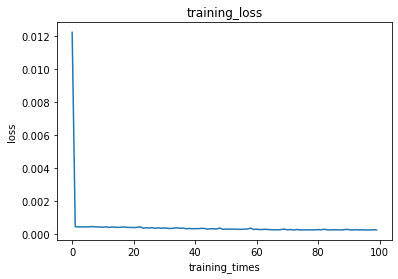

In [12]:
import matplotlib.pyplot as plt
plt.title('training_loss')
plt.xlabel('training_times')
plt.ylabel('loss')
plt.plot(history.history['loss'])

In [13]:
pred = model.predict(test_x)

In [14]:
pred = mms.inverse_transform(pred)

In [15]:
eva = model.evaluate(test_x,test_y)
eva

31/31 [==============================] - 0s 2ms/step - loss: 3.8239e-04


0.00038238847628235817

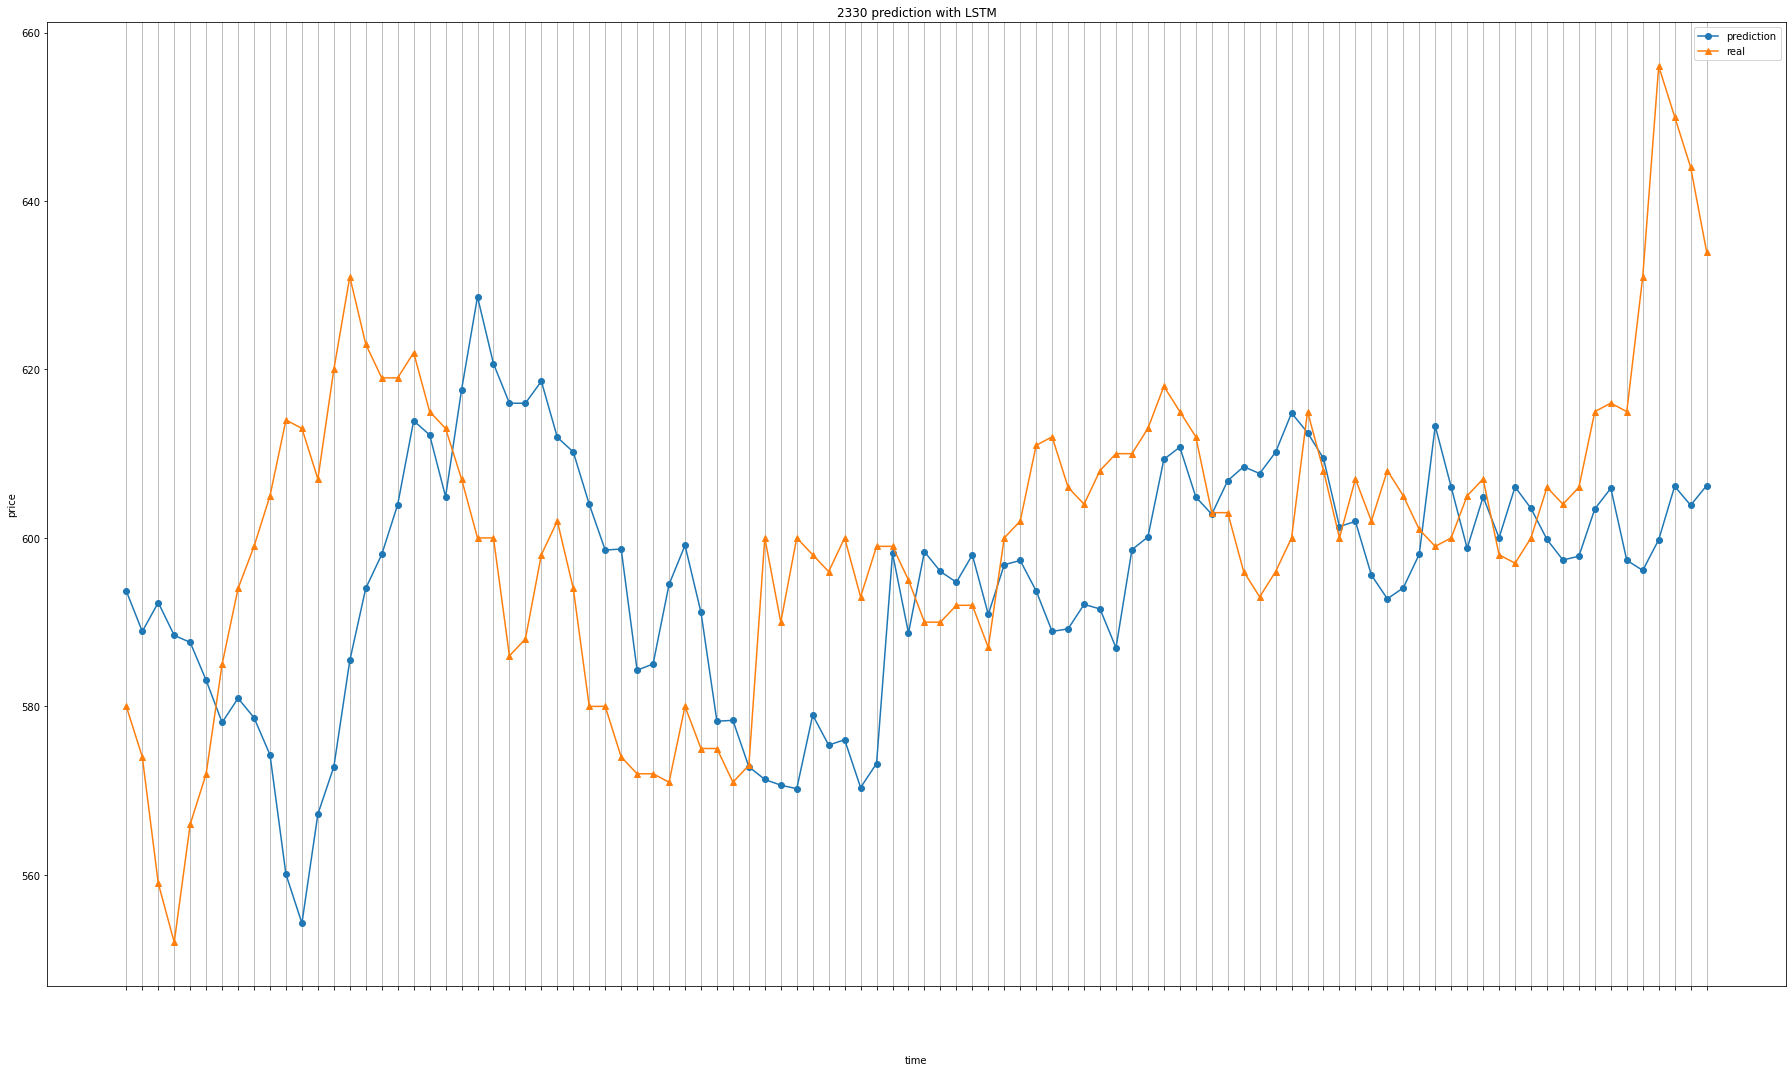

In [16]:
plt.figure(figsize=(25,15))
origin = data[data.Date >='2018/01/01'].Close.values
origin = np.flip(origin)
n = np.arange(100)
dates = data[data.Date >= '2018/01/01'].Date.head(100).values
plt.title('2330 prediction with LSTM')
plt.xlabel('time')
plt.xticks(n,dates,rotation = 270,color = 'white')
plt.ylabel('price')
plt.plot(pred[-100:],label = 'prediction',marker='o')
plt.plot(origin[-100:], label ='real',marker = '^')
plt.grid(axis='x')
plt.legend()
plt.tight_layout()